# How to apply the addressing scheme

This notebook outlines the steps how to get your hexagonally sampled data into the correct input format to use HexagDLy. In general, this is a mapping from the Cartesian x-y-cordinates of your data points to the indeces of the corresponding elements in a 2D-Matrix.

Hexagonally sampled data can have different appearances. One is the obvious case of an image with hexagonal pixels. Another possibility is image-like data e.g. from multiple detectors that are distributed on a plane but that are aligned on a hexagonal grid. In this case, each data point can be interpreted as the center of a hexagonal pixel.

Let's assume we have an array of detectors that are aligned on a hexagonal grid. Before we start, we fix the nomenclature. Given a equilateral hexagon, we will refer to the distance between its centre and its edges with the letter $r$ and to the distance between its centre and its corners with $a$.

Now, in the example below we have an examplary array of detectors (coloured points) in Cartesian coordinates. The hexagonal layout is illustrated by the grey grid-lines.

In [1]:
import numpy as np
import addressing_utils as au
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


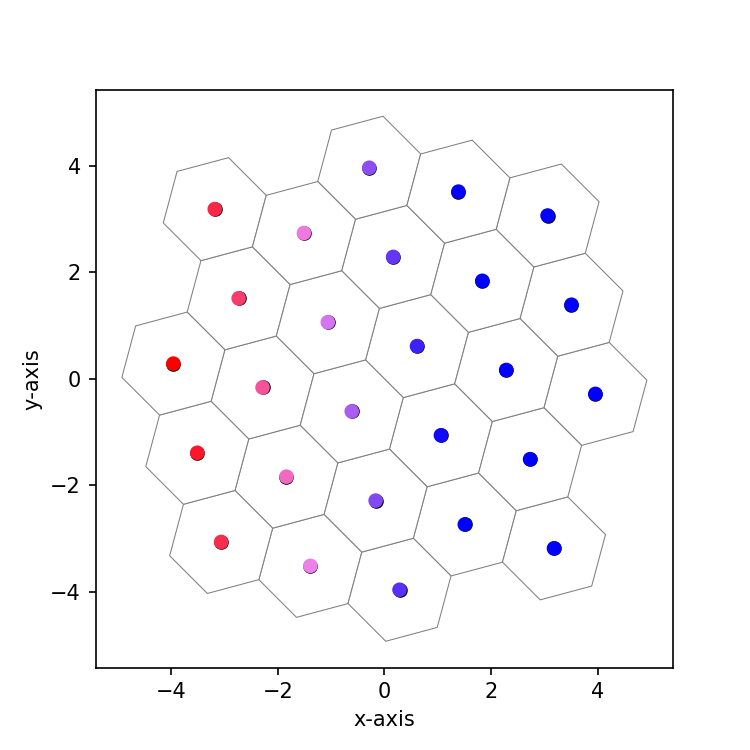

In [2]:
%matplotlib notebook

mydetector = au.Detector()
r,a = mydetector.r, mydetector.a
x,y = mydetector.x, mydetector.y

plt.figure('Original Cartesian layout',figsize=(5,5))
ax = plt.gca()
au.plot(ax,x,y,hexagons=True)

## First step
At first, we need to rotate the coordinates such that we find vertically aligned detectors, which will define columns. Therefore, we shift the origin of the coordinate system to the position of one of the detector and rotate the coordinates around it.

<IPython.core.display.Javascript object>


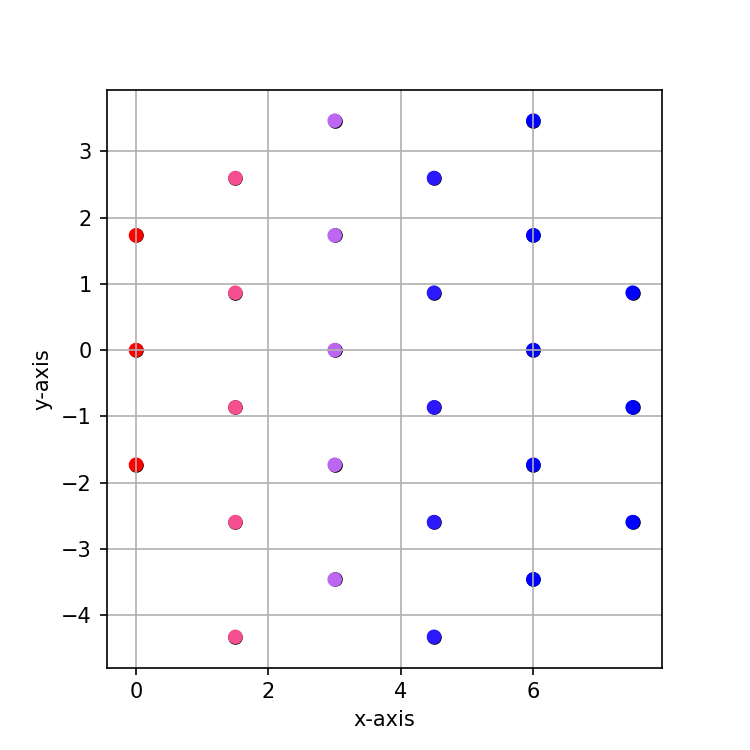

In [3]:
x,y = x-x[0], y-y[0]
radius = np.sqrt(x**2 + y**2)
theta = np.arctan2(y,x)
rotation = mydetector.rotation_angle
x,y = radius*np.cos(theta-rotation), radius*np.sin(theta-rotation)

plt.figure('rotated',figsize=(5,5))
au.plot(plt.gca(),x,y,grid=True)

## Second step
The next step is to align the detectors horizontally, which will define rows. This is done by shifting every second column **upwardly** by the length of $r$.

**Note**: It is important that those columns are shifted upwardly, not downwardly, for HexagDLy to make proper calculations.

<IPython.core.display.Javascript object>


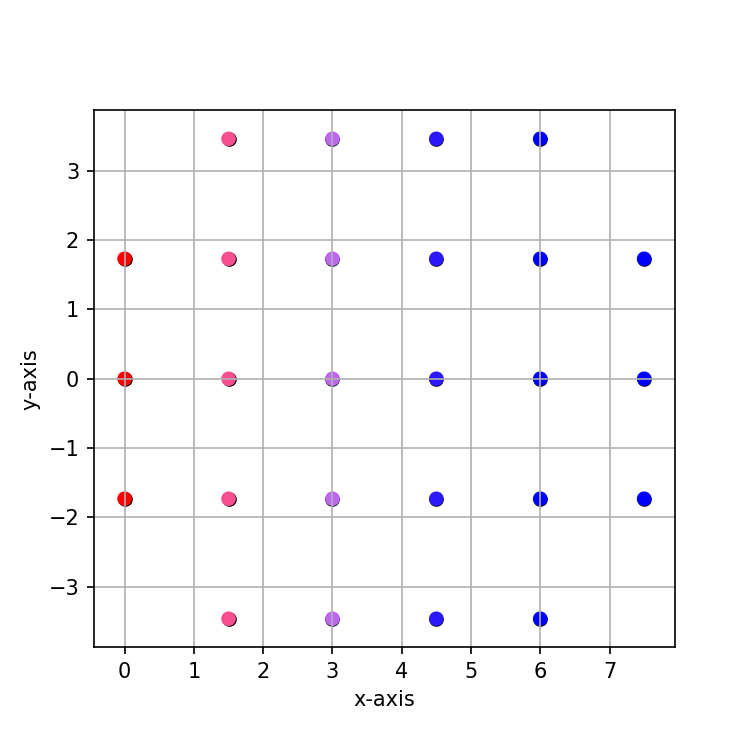

In [4]:
y = np.where(np.mod(np.round((x-x.min())/(1.5*a)),2)==1, y+r, y)
plt.figure('aligned',figsize=(5,5))
au.plot(plt.gca(),x,y,grid=True)

## Third step
Lastly, we want the indeces of the 2D-Matrix to be positive integers, counting rows from top to bottom and columns from left to right. Thus, we shift the origin of the coordinates again and scale them by $1.5a$ along the x-axis and by $2r$ along the y-axis, respectively.

<IPython.core.display.Javascript object>


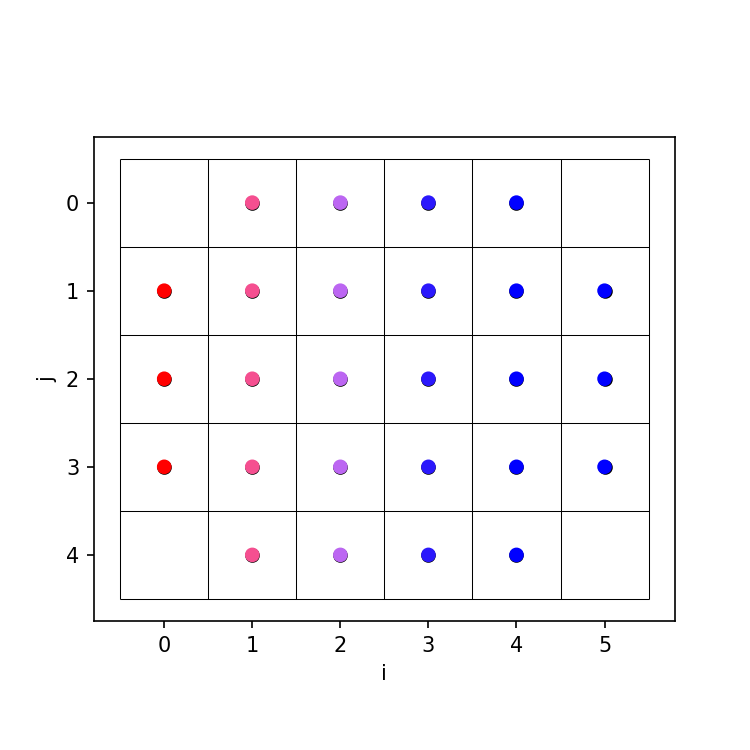

In [5]:
i,j = np.round((x-x.min()) / (1.5*a)), np.round((-1*(y-y.max())) / (2*r))
plt.figure('indexed',figsize=(5,5))
ax = plt.gca()
au.plot(ax,i,j,lines=True)
ax.invert_yaxis()